# Sets

Sets sind Mengen im Sinne der Mengenlehre. Mengen haben zwei wichtige Eigenschaften:

* Sie sind **ungeordnet**. Die Elemente einer Menge liegen also nicht wie bei einer Liste in einer bestimmten Reihenfolge vor.
* Jedes Element kann in einer Menge **nur genau ein Mal** enthalten sein. Wenn Sie z.B. eine Menge von Namen haben, darf in dieser Menge jeder Name nur genau ein Mal vorkommen. Das ist auch der Grund, warum in einer Menge veränderbare Datentypen als Werte nicht erlaubt sind. Sie können deshalb z.B. keine Menge von Listen anlegen.

In Python gibt es zwei Arten von Sets:

* **set** ist der Datentyp für veränderbare Mengen. Das bedeutet, das bei Bedarf Elemente hinzugefügt und entfernt werden können.
* **frozenset** ist der Datentyp für unveränderbare Mengen. Sie können z.B. eine Liste oder ein `set` in ein `frozenset` umwandeln. Dieses `frozenset` ist danach nicht mehr veränderbar. Da sich `frozensets` abgesehen von ihrer Unveränderlichkeit nicht von normalen Sets unterscheiden, werden wir nicht weiter darauf eingehen. 

## Sets erzeugen

So wie eckige Klammern eine Liste anlegen, wird eine Menge durch geschwungene Klammern erzeugt:

In [ ]:
names = {'Anton', 'Berta', 'Clara', 'Dieter'}
type(names)

Eine andere Möglichkeit besteht darin, andere Datentypen (Sequenztypen) in ein Set umzuwandeln. Dazu benötigen wir die Funktion `set()`: 

In [ ]:
names = ['Anton', 'Berta', 'Clara', 'Dieter']
nameset = set(names)
type(nameset)

Die Funktion `set()` wandelt also andere Typen in ein Set um. Sie ist auf alle *Iterables* anwendbar, also auf jeden Datentyp, der seine Elemente eines nach dem anderen zurückgeben kann.

### Beispiel: Liste in Set umwandeln

Im Notebook zu Bedingungen haben wir eine distinkte Liste von Vornamen erzeugt, indem wir in einer `for`-Schleife für jeden Eintrag der Namensliste überprüft haben, ob er bereits in der zweiten Liste `distinct_names` vorhanden war. Da es in einem Set per definitionem keine doppelten Einträge geben darf, können wir uns das zunutze machen, um dasselbe zu erreichen: Wir wandeln einfach unsere Liste von Namen in ein Set um.

Lesen wir zunächst noch einmal alle Name in die Liste `clean_names` ein:

In [ ]:
with open('../data/vornamen/names_short.txt', encoding='utf-8') as fh:
    clean_names = [line.rstrip() for line in fh.readlines()]

Dann wandeln wir die Liste in ein `set` um:

In [ ]:
distinct_names = set(clean_names)
print(f'clean_names: {len(clean_names)} Einträgen, distinct_names: {len(distinct_names)} Einträge')   

`distinct_names` ist jetzt aber keine Liste mehr, sondern vom Typ `set`:

In [ ]:
type(distinct_names)

Wir könnten das oben erzeugte Set einfach wieder in eine Liste zurückverwandeln um die schon bekannten Listenmethoden darauf anzuwenden:

In [ ]:
distinct_names = list(distinct_names)
type(distinct_names)

Wir können das sogar in einem Aufwasch erledigen:

In [ ]:
distinct_names = list(set(clean_names))
type(distinct_names), len(distinct_names)

Oft ist das aber gar nicht nötig, weil vieles, was mit Listen funktioniert, auch auf Sets anwendbar ist. Zum Beispiel kann man ein Set mit `sorted()` sortieren, wobei das Ergebnis dann natürlich eine Liste ist. Mit der Funktion `len()` können wir die Zahl der Elemente eines Sets ermitteln:

## Elemente zählen mit len()

Die Funktion `len()` kann auch auf Sets angewendet werden, um die Zahl der im Set vorhandenen Elemente zu zählen:

In [ ]:
distinct_names = set(clean_names)
len(distinct_names)

## Auf das Vorhandensein von Elementen prüfen mit dem in-Operator

Auch der `in`-Operator funktioniert genau gleich wie bei Listen: Mit `in` können wir testen, ob ein Wert im Set vorhanden ist:

In [ ]:
names = {'Anton', 'Berta', 'Clara'}
'Berta' in names

## Durch Sets iterieren mit for .. in

Sie können mit `for ... in` genau so durch ein Set iterieren, wie durch eine Liste. Dabei sollten Sie aber beachten, dass es im Unterschied zu Listen in Sets keine festgelegte Reihenfolge der Element gibt. Es ist also nicht vorhersehbar, in welcher Reihenfolge die Elemente in der Schleife verarbeitet werden. 

Zur Illustration können wir erneut die Vornamen in lange, mittellange und kurze Namen aufteilen und auszählen: 

In [ ]:
with open('../data/vornamen/names_short.txt', encoding='utf-8') as fh:
    distinct_names = set([line.rstrip() for line in fh.readlines()])

short_length_names = 0
medium_length_names = 0
long_length_names = 0

for name in distinct_names: # distinct_names is a set
    if len(name) > 8:
        long_length_names += 1
    elif len(name) < 5:
        short_length_names += 1
    else:
        medium_length_names += 1
        
print('{} kurze Namen, {} mittellange und {} lange Namen'.format(
    short_length_names, medium_length_names, long_length_names))

<div class="alert alert-block alert-info">
<b>Übung Set-1</b>
<p>Da auch Strings Sequenztypen sind, können Sie einen String in ein Set (von Zeichen) umwandeln. Verwenden Sie diese Technik, um herausfinden, aus wie vielen <b>unterschiedlichen</b> Buchstaben Ihr Name besteht.</p>
</div>

In [ ]:
name = input('Geben Sie Ihren Namen ein: ')
distinct_chars =  # TODO
print(f'Ihr Name besteht aus {len(name)} Zeichen, {len(distinct_chars)} davon sind unterschiedlich')

## Mengen verändern


### Werte zu einem Set hinzufügen

Ein neues Element kann einer Menge mit der Methode `add()` hinzugefügt werden. Registrieren Sie bitte den feinen semantischen Unterschied zu `append()` bei Listen: `append()` fügt ans Ende der List hinzu; da ein Set aber keine definierte Reihenfolge hat, wird ein neues Element mit `add()` hinzugefügt: Das neue Element wird einfach der Menge hinzugefügt, ohne dass damit eine bestimmte Position impliziert wird.

In [ ]:
names = {'Anna', 'Berta', 'Clara'}
names.add('Dieter')
names

Man kann natürlich auch mit einem leeren Set starten. Hier funktioniert allerdings die Notation mit den geschwungenen Klammern nicht, weil diese bereits für die Erzeugung eines leeren Dictionaries verwendet wird. Daher müssen wir explizit ein `set`-Objekt erzeugen:

In [ ]:
names = set()
names.add('Anna')
names.add('Berta')
names

Da in einem Set jedes Element nur einmal vorkommen kann, ignoriert ein Set ein hinzugefügtes Element stillschweigend, wenn es bereits vorhanden ist:

In [ ]:
names = {'Anna', 'Berta', 'Clara'}
names.add('Anna')
names

### Werte aus einem Set entfernen mit discard()

Die Methode `discard()` entfernt ein bestimmtes Element aus einem Set:

In [ ]:
names = {'Anna', 'Berta', 'Carla', 'Dora'}
print(names)
names.discard('Berta')
names

Falls wir versuchen, ein nicht existierendes Element mit `discard()` zu entfernen, ignoriert Python das stillschweigend:

In [ ]:
names = {'Anna', 'Berta', 'Carla', 'Dora'}
print(names)
names.discard('Zita')
names

### Werte aus einem Set entfernen mit remove()

Ein alternative Methode zum Entfernen eines Elements steht mit `remove()`zur Verfügung:

In [ ]:
names = {'Anna', 'Berta', 'Carla', 'Dora'}
print(names)
names.remove('Berta')
names

Der Unterschied zu `discard()` liegt in der Weise, wie Python darauf reagiert, wenn wir versuchen, ein nicht existierendes Element zu entfernen:

In [ ]:
names = {'Anna', 'Berta', 'Carla', 'Dora'}
print(names)
names.remove('Zita')
names

Hier wird das Fehlen des Wertes nicht einfach ignoriert, sondern es wird eine Exception ausgelöst. Was das ist, werden wir in einem der nächsten Notebooks lernen.

### Einen Wert entfernen mit `pop()`


In [ ]:
names = {'Anna', 'Berta', 'Carla', 'Dora'}
print(names)
names.pop()
names

Wir haben gelernt, dass `pop()` das letzte Element einer Liste entfernt. Da ein Set keine definierte Reihenfolge hat, wird hier durch `pop()` ein nicht vorhersehbares Element aus dem Set entfernt. Die Methode macht dennoch Sinn, etwa wenn in einer `while`-Schleife ein Element nach dem anderen aus dem Set entfernt werden soll: 

In [ ]:
names = {'Anna', 'Berta', 'Carla', 'Dora'}
while names:  # True, solange noch Elemente vorhanden sind
    print(names.pop())
names # now empty

### Alle Werte aus einem Set löschen

Zum Löschen aller Werte aus einem Set gibt es die Methode `clear()`:

In [ ]:
names = {'Anna', 'Berta', 'Carla', 'Dora'}
print(names)
names.clear()
names

<div class="alert alert-block alert-info">
<b>Übung Set-2</b>
<ol>
<li>Lesen Sie die Datei <tt>../data/vornamen/vornamen_2015.txt</tt> zeilenweise ein, entfernen Sie die Zeilenumbrüche und wandeln die so entstandene Liste in ein Set <tt>distinct_names</tt> um.</li>
<li>Iterieren Sie in einer Schleife durch dieses Set und geben Sie alle Einträge aus, die aus 3, 4 oder 5 Zeichen bestehen.</li>
</ol>
</div>

## Mengenoperationen

Das Enfernen von mehrfach vorkommenden Elementen ist zwar ein nettes Feature, der eigentliche Zweck von Sets aber ist, dass wir damit Mengenlehre betreiben können. 

### Die Schnittmenge bilden

Nehmen wir an, wir haben zwei Freundesgruppen: Eine aus dem Umfeld der Universität, eine zweite treffen wir regelmässig beim Bouldern:

In [ ]:
uni_friends = {'Anna', 'Georg', 'Hannes', 'Sabrina'}
boulder_friends = {'Emil', 'Sabrina', 'Georg'}

Wenn wir herausfinden wollen, wer beiden Gruppen angehört, müssen wir die Schnittmenge der beiden Sets bilden.

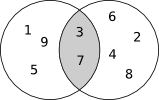

In [ ]:
uni_friends & boulder_friends

Wir haben hier den `&`-Operator kennen gelernt, der auf zwei Mengen angewendet, die Schnittmenge dieser beiden Mengen bildet.

Alternativ zum `&`-Operator können Sie die `intersection()`-Methode eines `set`-Objekts verwenden:

In [ ]:
uni_friends.intersection(boulder_friends)

### Differenzmenge zweier Sets bilden

Die Differenz zweier Mengen entsteht dadurch, dass alle Elemente, die in beiden Mengen vorhanden sind,
aus der einen Menge entfernt wird: Es bleiben somit nur die Elemente, die nur in der einen Menge vorhanden sind.

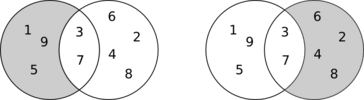

Um das etwas konkreter zu machen: Wenn wenn wir heraufinden wollen, welche unserer Freunde wir nur von der Uni kennen, ist der Differenzoperator `-` genau das, was wir brauchen:

In [ ]:
uni_friends - boulder_friends

Auch hier gibt es alternativ zum Operator eine Methode: `difference()`

In [ ]:
uni_friends.difference(boulder_friends)

Wenn wir herausfinden wollen, wenn wir nur vom Bouldern kennen, müssen wir die beiden Sets vertauschen:

In [ ]:
boulder_friends - uni_friends

bzw. so:

In [ ]:
boulder_friends.difference(uni_friends)

### Vereinigungsmenge zwei Mengen bilden

Ebenso einfach kann die Vereinigungsmenge erzeugt werden:

In [ ]:
uni_friends | boulder_friends

enthält nun alle Elemente aus beiden Mengen.

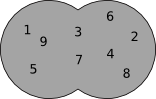

Auch hier gibt es eine Methode, die daselbe tut wie der `|`-Operator: `.union()`:

In [ ]:
uni_friends.union(boulder_friends)

## Weitere nützliche Methoden

Beim Programmieren geschieht nicht selten, dass man etwas selbst programmiert und dann später herausfindet, dass diese Funktionalität ohnehin bereits vorhanden war. Deshalb stelle ich hier noch kurz ein paar weitere nützliche Methoden des Set-Objekts vor. (Ab hier kein Prüfungsstoff, da sie das jederzeit nachschlagen können).

### Gibt es Überschneidungen?

Um herauszufinden, ob zwei Mengen keine gemeinsamen Elemente haben, können Sie `isdisjoint()` verwenden:

In [ ]:
uni_friends = {'Anna', 'Georg', 'Hannes', 'Sabrina'}
boulder_friends = {'Emil', 'Sabrina', 'Georg'}
beer_friends = {'Otto', 'Lisa', 'Hans'}

uni_friends.isdisjoint(boulder_friends)

In [ ]:
uni_friends.isdisjoint(beer_friends)

## Ist eine Menge ein Subset der anderen Menge?

Um herauszufinden, ob alle Element der einen Menge in der anderen Menge enthalten sind, können Sie `issubset()` verwenden.

In [ ]:
uni_friends = {'Anna', 'Georg', 'Hannes', 'Sabrina'}
beer_friends = {'Anna', 'Hannes'}

beer_friends.issubset(uni_friends)

Anders herum können Sie diese Frage mit `issuperset()` lösen:

In [ ]:
uni_friends = {'Anna', 'Georg', 'Hannes', 'Sabrina'}
beer_friends = {'Anna', 'Hannes'}

uni_friends.issuperset(beer_friends)

## Vertiefende Literatur
Ich empfehle ausdrücklich, mindestens eine der folgenden Ressourcen zur Vertiefung zu lesen!

  * Python Tutorial: Kapitel 5.4
    (https://docs.python.org/3/tutorial/datastructures.html#sets).
  * Klein, Kurs: Mengen (https://python-kurs.eu/python3_sets_mengen.php).
  
  
  * Klein, Buch: Kapitel 7.
  * Kofler: Kapitel 7.4.
  * Inden: Kapitel 2.9.3 und 5.1.2.
  * Weigend: Kapitel 7.6.
  * Pilgrim: Kapitel 2.5
    (https://www.diveinto.org/python3/native-datatypes.html#sets).

## Lizenz

This notebook ist part of the course [Grundlagen der Programmierung](https://github.com/gvasold/gdp) held by [Gunter Vasold](https://online.uni-graz.at/kfu_online/wbForschungsportal.cbShowPortal?pPersonNr=51488) at Graz University 2017&thinsp;ff. 

<p>
    It is licensed under <a href="https://creativecommons.org/licenses/by-nc-sa/4.0">CC BY-NC-SA 4.0</a>
</p>

<table>
    <tr>
    <td>
        <img style="height:22px" 
             src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"/></li>
    </td>
    <td>
    <img style="height:22px;"
         src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" /></li>
    </td>
    <td>
        <img style="height:22px;"
         src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1" /></li>
    </td>
    <td>
        <img style="height:22px;"
             src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" /></li>
    </td>
</tr>
</table>

---

<div style="text-align: center; margin-top:20pt;">  
  <a href="01-dictionaries.ipynb">← Vorheriges Notebook</a>  
  <span style="width: 100px;display: inline-block;"> </span>
    <a href="00-inhalt.ipynb">↑ Inhaltsübersicht</a>
    <span style="width: 100px;display: inline-block;"> </span>
  <a href="03-tuples.ipynb">Nächstes Notebook →</a>  
</div> 